In [2]:
import pandas as pd
import shap
import sklearn

# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


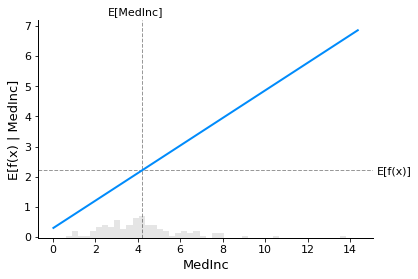

In [4]:
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [17]:
?shap.Explainer

Init signature:
shap.Explainer(
    model,
    masker=None,
    link=CPUDispatcher(<function identity at 0x17ff96170>),
    algorithm='auto',
    output_names=None,
    feature_names=None,
    linearize_link=True,
    seed=None,
    **kwargs,
)
Docstring:     
Uses Shapley values to explain any machine learning model or python function.

This is the primary explainer interface for the SHAP library. It takes any combination
of a model and masker and returns a callable subclass object that implements
the particular estimation algorithm that was chosen.
Init docstring:
Build a new explainer for the passed model.

Parameters
----------
model : object or function
    User supplied function or model object that takes a dataset of samples and
    computes the output of the model for those samples.

masker : function, numpy.array, pandas.DataFrame, tokenizer, None, or a list of these for each model input
    The function used to "mask" out hidden features of the form `masked_args = masker(*mod

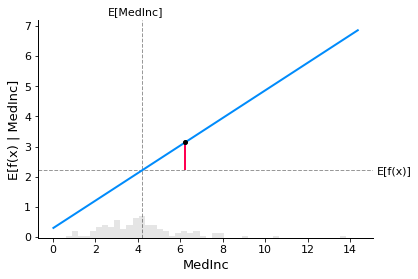

In [5]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [10]:
shap_values.values.shape

(1000, 8)

In [13]:
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12900,2.7181,23.0,4.867500,1.022500,866.0,2.165000,38.63,-121.33
3922,5.4548,35.0,5.585714,1.028571,425.0,3.035714,34.19,-118.56
9120,3.2750,32.0,5.576779,1.146067,774.0,2.898876,34.58,-118.10
13310,4.6167,11.0,4.694836,0.917840,1503.0,3.528169,34.09,-117.61
18873,3.1053,37.0,5.447674,1.044574,1574.0,3.050388,38.08,-122.22
...,...,...,...,...,...,...,...,...
13537,4.3438,33.0,6.180769,1.084615,608.0,2.338462,34.15,-117.30
3280,2.0417,24.0,6.979911,1.504464,1015.0,2.265625,39.08,-122.86
16734,3.3816,36.0,4.761589,1.079470,1649.0,2.184106,37.68,-122.40
1614,7.6202,27.0,7.122078,0.987013,2212.0,2.872727,37.86,-122.09


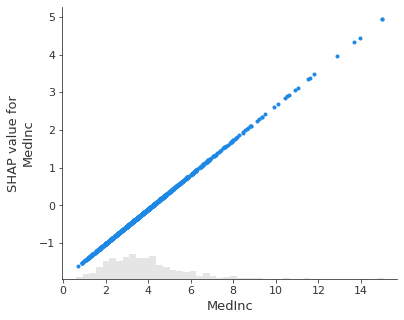

In [6]:
shap.plots.scatter(shap_values[:,"MedInc"])

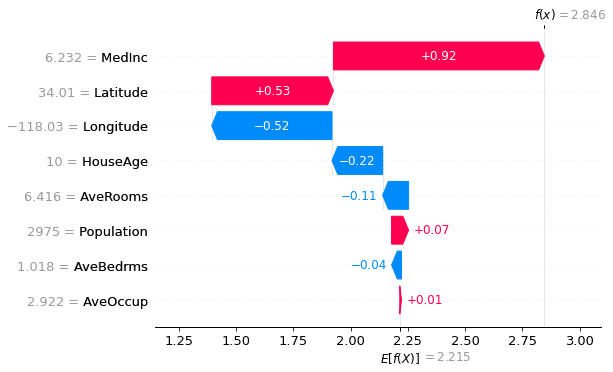

In [7]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

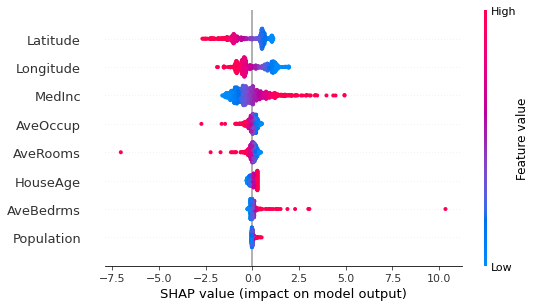

In [8]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.